In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


While reading our dataset, we encountered some issues due to a mismatch in the number of columns, so we decided to output the row number and its content to determine our next steps, whether we needed to eliminate them or if we could retain them with some modifications.

In [31]:
filepath = r"C:\Users\rebbi\Desktop\Magistrale\FDS\progetto2023\data.csv"

with open(filepath, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    data = []
    for row in reader:
        if len(row) == 2:  # we expect 2 fields per line
            data.append(row)
        else:
            print(f"Issue with line {reader.line_num}: {row}")



Issue with line 2810: ['selim', 'selim_syl1905@hotmail.com', '88.230.79.161', 'Poftya123', '2']
Issue with line 4641: ['Selim', 'delioreanxs@hotmail.com', '85.97.14.203', 'selim123456', '2']
Issue with line 7171: ['Selim', 'mt2gurur@hotmail.com', '88.227.187.9', 'benerkin98', '2']
Issue with line 11220: ['Selim', 'facebookselim4@hotmail.com', '94.123.218.111', '4938863a', '2']
Issue with line 13809: ['selim', 'anakonda_252@hotmail.com', '85.110.117.124', '4560458sg', '2']
Issue with line 14132: ['selim', 'mamedov.kenan@mail.ru', '93.184.224.230', '1449a1449a', '2']
Issue with line 14293: ['Selim', 'destek@migmedya.com', '94.122.28.186', 'sanane05', '2']
Issue with line 14865: ['selim', 'elitebank44@gmail.com', '78.180.132.32', 'selim123', '2']
Issue with line 17419: ['selim', 'memleketim.info@gmail.com', '78.183.49.245', 'salih5134', '2']
Issue with line 22801: ['selim', 'canersastim@gmail.com', '78.160.123.7', 'tc1416', '2']
Issue with line 25001: ['selim', 'arifselim.ask@gmail.com', 

We utilized the 'csv' function to process the dataset, eliminating superfluous columns. This was necessary as we observed that numerous rows included additional information such as name, email, and IP address, beyond the password and strength data we were interested in. We then established a new dataset, 'cleaned_data', into which we incorporated the accurate data. We also corrected the header, which was initially misread due to the varying number of columns in different rows. Specifically, while the first two columns had the headers we required, rows with more than two columns had different headers. 

In [2]:
import pandas as pd
import csv

# Paths for input and output files
input_file = r"data.csv"
output_file = r"cleaned_data1.csv"
df = []

with open(input_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)

    for row in reader:
        if len(row) > 2:  
            last_two_columns = ','.join(row[-2:])  
            df.append(last_two_columns.split(','))  
        else:
            df.append(row)

df = pd.DataFrame(df, columns=['Password', 'Strength'])
df = df.drop(0).reset_index(drop=True)

chars_to_remove = ['\x7f', '\x81', '\xa0', '\x01', '\x02', '\x04', '\x05', '\x06',
                   '\x08', '\x0e', '\x0f', '\x10', '\x11', '\x12', '\x13', '\x16',
                   '\x17', '\x18', '\x19', '\x1b', '\x1c', '\x1d', '\x1e', '\x8d']

for char in chars_to_remove:
    df = df[~df['Password'].str.contains(char)]

# Drop rows where 'Password' column is empty or contains NaN
df.dropna(how='any', inplace=True)

df.to_csv(output_file, index=False, encoding='utf-8')



In [5]:
df.head()

,Password,Strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


We convert the dtype of the column Strenght from object to int64 

In [9]:
# Convert 'Strength' column to numeric type (int64)
df['Strength'] = pd.to_numeric(df['Strength'], errors='coerce')  

# Check the data types after conversion
print(df.dtypes)

Password    object
Strength     int64
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669844 entries, 0 to 669878
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Password  669844 non-null  object
 1   Strength  669844 non-null  object
dtypes: object(2)
memory usage: 31.5+ MB


In [15]:
total_rows = len(df)
print(f"The total number of rows in the DataFrame is: {total_rows}")


The total number of rows in the DataFrame is: 669844


The total number of rows in the dataset coincides with the number of non-null values in our dataset, indicating that there are no null values. 
But we decide to do a double check.

In [16]:
null_passwords = df['Password'].isnull().sum()
if null_passwords > 0:
    print(f"the column 'Password' contain {null_passwords} null value.")
else:
    print("No null value in the 'Password' column.")



null_strength= df['Strength'].isnull().sum()
if null_strength > 0:
    print(f"the column 'Strength' contain {null_strength} null value.")
else:
    print("No null value in the 'Strebgth' column.")

No null value in the 'Password' column.
No null value in the 'Strebgth' column.


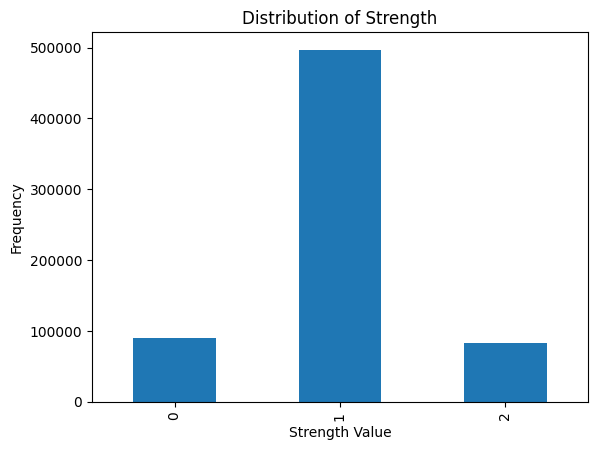

In [19]:
# Histogram plot of the 'Strength' column
df['Strength'].value_counts().sort_index().plot(kind='bar')

plt.title('Distribution of Strength')
plt.xlabel('Strength Value')
plt.ylabel('Frequency')
plt.show()



Save Train and test for tfidf features

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import pandas as pd
df = pd.read_csv('cleaned_data1.csv')

In [4]:
# TF-IDF of each sample's carachter 
psw = df['Password'].values
vec = TfidfVectorizer(analyzer='char')
X = vec.fit_transform(psw)
tfidf_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out(), index=df.index)
# Merge the original DataFrame with the TF-IDF DataFrame based on indices
merged_df = df.join(tfidf_df)
merged_df

,Password,Strength,,!,"""",#,$,%,&,(,...,ÿ,œ,ƒ,—,‚,‡,…,‹,›,™
0,kzde5577,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,kino3434,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,visi7k1yr,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,megzy123,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,lamborghin1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669839,10redtux10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669840,infrared1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669841,184520socram,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669842,marken22a,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Ottieni tutti i nomi delle colonne come lista e stampa l'intero output
all_columns = merged_df.columns.to_list()
print(all_columns)


['Password', 'Strength', ' ', '!', '"', '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨', '«', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º', '¼', '½', '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'œ', 'ƒ', '—', '‚', '‡', '…', '‹', '›', '™']


In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming merged_df contains your dataset
X, y = merged_df.drop(["Password", "Strength"], axis=1), merged_df["Strength"]

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save training data to a file
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train_tfidf.csv', index=False)

# Save testing data to a file
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test_tfidf.csv', index=False)

Character features train and test

In [ ]:
import pandas as pd
import csv

# Paths for input and output files
input_file = r"C:\Users\anton\Documents\GitHub\FDS-Project\data.csv"
output_file = r"C:\Users\anton\Documents\GitHub\FDS-Project\cleaned_data.csv"
df = []

with open(input_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)

    for row in reader:
        if len(row) > 2:  
            last_two_columns = ','.join(row[-2:])  
            df.append(last_two_columns.split(','))  
        else:
            df.append(row)

df = pd.DataFrame(df, columns=['Password', 'Strength'])
df = df.drop(0).reset_index(drop=True)


# Drop rows where 'Password' column is empty or contains NaN
df.dropna(subset=['Password'], inplace=True)

df.to_csv(output_file, index=False, encoding='utf-8')


In [5]:
print(max_length)

30.0


In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
df['Password'] = df['Password'].str.slice(0, 30)
max_length = df['Password'].str.len().max()
position_df = pd.DataFrame(df['Password'].apply(lambda row: list(row.ljust(max_length))).tolist())
position_df = position_df.map(lambda x: ord(x))

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(position_df, y, test_size=0.2, random_state=42)

# Save training data to a file
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train_data_char.csv', index=False)

# Save testing data to a file
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test_data_char.csv', index=False)


TypeError: 'numpy.float64' object cannot be interpreted as an integer